In [1]:
import gempipe
import pandas as pnd

In [5]:
report = pnd.read_csv('gempipe/output_derive/derive_strains.csv', index_col=0)
report = report.rename(columns={'species':  'subsp.'})

# import binary feature tables:
biosynth = pnd.read_csv('gempipe/output_derive/biosynth.csv', index_col=0)
rpam = pnd.read_csv('gempipe/output_derive/rpam.csv', index_col=0)
feats = pnd.concat([biosynth, rpam], axis=0)


# select interesting metabolites:
feats = feats.loc[[
    'thf_c',  # vitamin B9  (tetrahydrofolate)
    'adeadocbl_c',  # vitamin B12
    '3hppnl_c',   # reuterin (3-hydroxypropanal)
    'hista_c',   # histamine (HISDC)
    'UREA',  # conversion urea → co2 + nh4
], :]
feats

,GCA_020785095.1,GCA_002112245.1,GCA_019336465.1,GCA_020784295.1,GCA_002128525.1,GCA_014145445.1,GCA_024652885.1,GCA_009389245.1,GCA_000236455.2,GCA_003174865.1,...,GCA_001657495.1,GCA_002253685.1,GCA_020785295.1,GCA_020785945.1,GCA_002254095.1,GCA_020785865.1,GCA_046938255.1,GCA_020784355.1,GCA_045269915.1,GCA_002253725.1
thf_c,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
adeadocbl_c,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,...,1.0,NaN,0.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN
3hppnl_c,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
hista_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
UREA,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


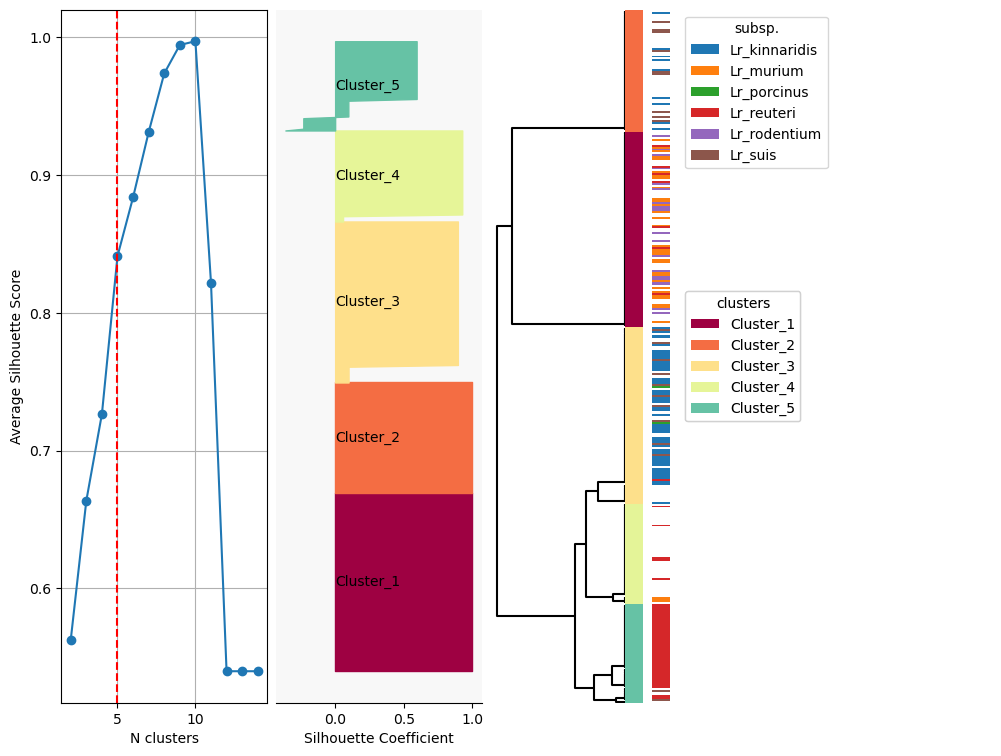

In [6]:
fig, acc_to_cluster, cluster_to_color = gempipe.silhouette_analysis( 
    figsize = (12,9), forcen=5, ctotest=range(2,15,1), 
    derive_report=report, report_key='subsp.', excludekeys=['other_Lr'],
    tables={'presence': feats}, 
)

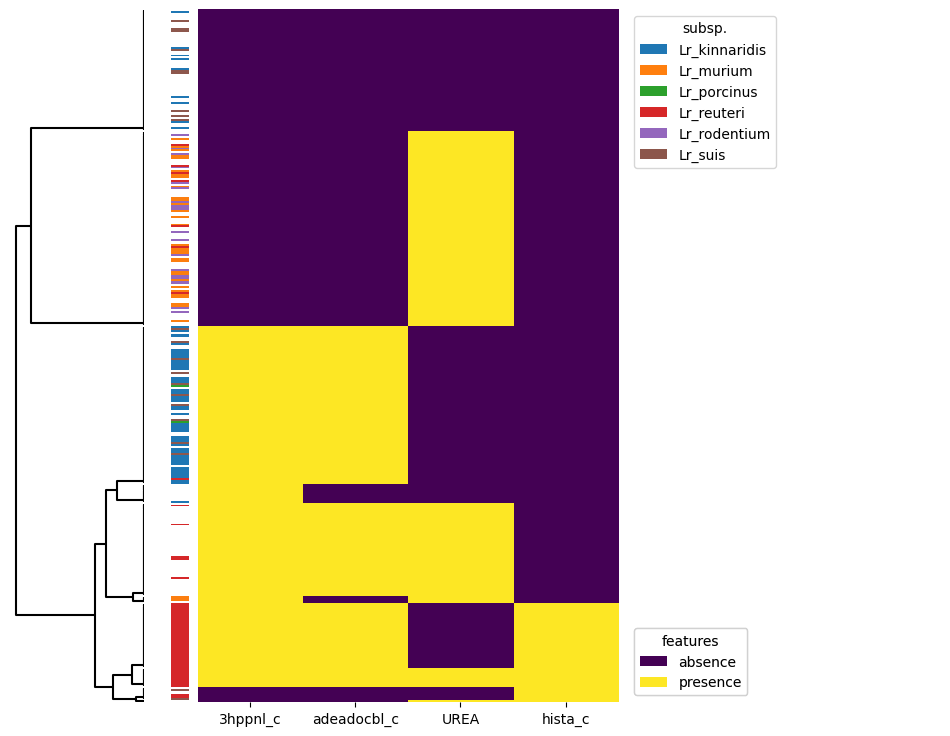

In [7]:
fig, ord_data_bool = gempipe.heatmap_multilayer(
    figsize = (12,9),  
    derive_report=report, report_key='subsp.', excludekeys=['other_Lr'],
    tables={'presence': feats},  xlabels=True,
)